In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [2]:
os.chdir("D:/edwisor/Projects/bike rental")

In [3]:
data = pd.read_csv("day.csv")

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Characteristics:
The dataset is very concise and missing values are not a problem. 
Most of the data is already normalized or binary. 
Categorical data like 'weekday' or 'working day' are already processed. 

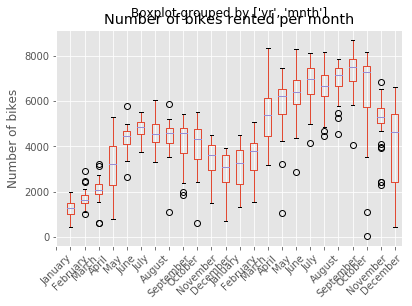

In [5]:
# Visulazation

plt.style.use('ggplot')

data.boxplot(column='cnt', by=['yr','mnth'])

plt.title('Number of bikes rented per month')
plt.xlabel('')
plt.xticks((np.arange(0,len(data)/30,len(data)/731)), calendar.month_name[1:13]*2, rotation=45)
plt.ylabel('Number of bikes')

plt.show()



# Exploratory Visualization
The visualization shows a classic seasonal pattern with an up trend year over year. There are some outliers. These are left in the dataset because they are not due to measurement errors, but to extreme weather conditions. Because extreme weather conditions are part of the problem, so the data is not excluded.

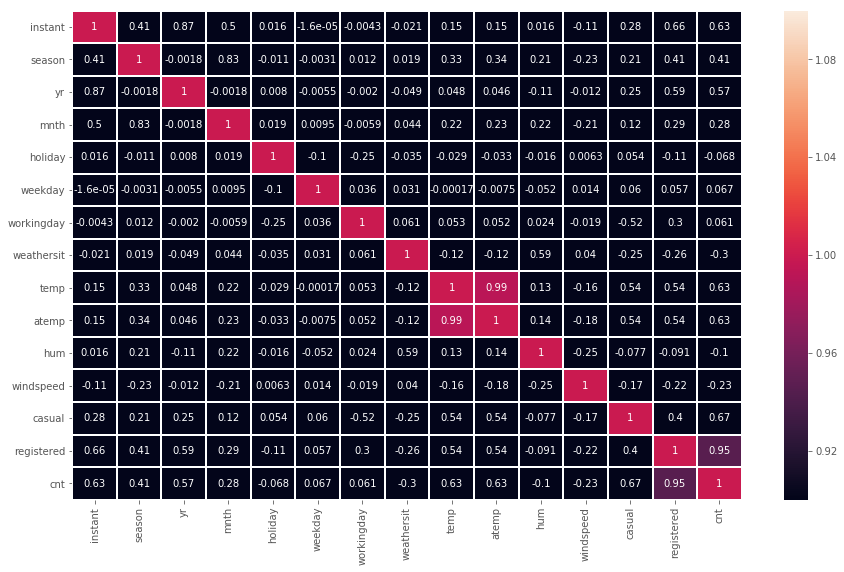

In [6]:
#Feature Selection
#heat map
plt.figure(figsize=(15, 9))
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=1, vmin=1, vmax=1)

# Data Preprocessing (Methodology) 
Dates get dropped because the regressor can not read this datatype and the information is already stored in the 'mnth' and 'yr' feature.  As 'temp' and 'atemp' are highly correlated from heatmap, "atemp" is dropped. 

In [7]:
data = data.drop(columns = ["dteday", "instant", "atemp", "casual", "registered"])

In [8]:
train, test = train_test_split(data, test_size =0.2)

In [9]:
#MODEL BUILDING
Rsq_value = []
MAE_value = []
RMSE_value = []
MAPE_value = []

def register_model_score(rsq, mae, rmse, mape):
    Rsq_value.append(rsq)
    MAE_value.append(mae)
    RMSE_value.append(rmse)
    MAPE_value.append(mape)
    
def generate_score(y_test, predictions):
    rsq = r2_score(y_true = y_test, y_pred = predictions)
    mse = mean_squared_error(y_true = y_test, y_pred = predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - predictions)/y_test))
    print("R sq ="+ str(rsq))
    print("MAE ="+ str(mae))
    print("RMSE = "+ str(rmse))
    print("MAPE =" + str(mape))
    return(rsq, mae, rmse, mape)


In [10]:
#Decision Tree
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:10], train.iloc[:,10])

#predict new test cases
predictions_DT = fit_DT.predict(test.iloc[:,0:10])



In [11]:
#model score
rsq_val, mse_val, rmse_val, mape_val = generate_score(test.iloc[:,10], predictions_DT)

register_model_score( rsq_val, mse_val, rmse_val, mape_val)

R sq =0.7143400289349408
MAE =809.0382239577439
RMSE = 979.9197134695983
MAPE =0.24959735681247697


In [12]:
#Linear regression
LR = LinearRegression()
LR.fit(train.iloc[:,0:10], train.iloc[:,10])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
LR_Pred = LR.predict(test.iloc[:,0:10])

In [14]:
#model score
rsq_val, mse_val, rmse_val, mape_val = generate_score(test.iloc[:,10], LR_Pred)
register_model_score( rsq_val, mse_val, rmse_val, mape_val)

R sq =0.7993669928673378
MAE =615.0721934594166
RMSE = 821.2341335392185
MAPE =0.16893691285559814


In [15]:
#Random forest
RF_model = RandomForestRegressor(n_estimators = 500).fit(train.iloc[:,0:10], train.iloc[:,10])
RF_predictions = RF_model.predict(test.iloc[:,0:10])


In [16]:
#model score
rsq_val, mse_val, rmse_val, mape_val = generate_score(test.iloc[:,10], RF_predictions)
register_model_score(rsq_val, mse_val, rmse_val, mape_val)

R sq =0.8731930674040647
MAE =459.73602721088434
RMSE = 652.8859148154509
MAPE =0.14600417729411597


In [17]:
#KNN
knn_model = KNeighborsRegressor(n_neighbors =3).fit(train.iloc[:,0:10], train.iloc[:,10])
knn_predictions = knn_model.predict(test.iloc[:,0:10])


In [18]:
#model score
rsq_val, mse_val, rmse_val, mape_val = generate_score(test.iloc[:,10], knn_predictions)
register_model_score(rsq_val, mse_val, rmse_val, mape_val)

R sq =0.7634247470144008
MAE =676.6303854875283
RMSE = 891.7650701206153
MAPE =0.21334565186621288


In [19]:
#XGBoost regressor
reg = XGBRegressor(n_estimators = 500, seed =124, learning_rate = 0.1)
reg.fit(train.iloc[:,0:10], train.iloc[:,10])


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=124,
       silent=True, subsample=1)

In [20]:
XGB_predictions = reg.predict(test.iloc[:,0:10])

In [21]:
#model score
rsq_val, mse_val, rmse_val, mape_val = generate_score(test.iloc[:,10], XGB_predictions)
register_model_score(rsq_val, mse_val, rmse_val, mape_val)

R sq =0.8912515530645813
MAE =462.99649317734907
RMSE = 604.6127933306782
MAPE =0.14578546966255362


In [22]:
Model_name = ["Decision Tree", "Linear Regression", "Random Forest", "KNN Regressor", "XGB Regressor"]

In [23]:
#Model summary
df = pd.DataFrame({"Model_name" : Model_name,
                "R-sq":  Rsq_value,
                "MAE":  MAE_value,
                "RMSE": RMSE_value,
                "MAPE": MAPE_value}, 
                   columns = ['Model_name', 'R-sq', 'MAE', 'RMSE', 'MAPE'])
df

,Model_name,R-sq,MAE,RMSE,MAPE
0,Decision Tree,0.714340,809.038224,979.919713,0.249597
1,Linear Regression,0.799367,615.072193,821.234134,0.168937
2,Random Forest,0.873193,459.736027,652.885915,0.146004
3,KNN Regressor,0.763425,676.630385,891.765070,0.213346
4,XGB Regressor,0.891252,462.996493,604.612793,0.145785


# Higher the value of r square and lower the value of MAE, RMSE and MAPE better the model.  Hence decided to fix XGB regressor for this dataset.



In [24]:
Predict = pd.DataFrame(XGB_predictions)
Predict = Predict.rename(columns = {0:'Predictions'})
test = test.join(Predict['Predictions'])

In [25]:
test.to_csv("output_python.csv", index = False)